## 한국복지 패널 데이터
- 한국보건사회연구원에서 우리나라 가구의 경제활동을 연구해 복지 정책에 반영할 목적으로 발간한 자료
- 전국 7천여 가구를 선정해서 2006년도부터 2019년도까지 조사한 자료

In [1]:
# 데이터 분석에 필요한 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
welfare = pd.read_csv('welfare.csv')  # 한글 X -> 인코딩할 필요 X
welfare

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14413,14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [3]:
welfare = welfare.drop(labels = 'Unnamed: 0', axis = 1)
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [4]:
# 복지데이터 정보 확인
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       14418 non-null  float64
 1   birth        14418 non-null  float64
 2   marriage     14418 non-null  float64
 3   religion     14418 non-null  float64
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  14418 non-null  float64
dtypes: float64(7)
memory usage: 788.6 KB


In [5]:
# 데이터 안에 결측치가 몇 개 있는지 파악
welfare.isnull().sum()

gender            0
birth             0
marriage          0
religion          0
income         9884
code_job       7540
code_region       0
dtype: int64

### 데이터 전처리

In [6]:
# 데이터 전처리를 하기 전에 기존의 데이터가 손상되지 않도록 복사본 생성
welfare_copy = welfare.copy()
welfare = welfare_copy.copy()
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [7]:
# 데이터 이상치 있는지 여부 확인

welfare['gender'].value_counts()  # 이상치가 없다!

# 1 -> man, 2 -> woman

gender
2.0    7913
1.0    6505
Name: count, dtype: int64

In [8]:
welfare['gender'] == 1.0  # --> 남자 = 'male'

welfare['gender'] = np.where(welfare['gender'] == 1.0 , 'male', 'female')  # replace 함수와 비슷한 기능
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,2.0,1.0,NaN,NaN,1.0
1,male,1948.0,2.0,2.0,NaN,NaN,1.0
2,male,1942.0,3.0,1.0,107.0,762.0,1.0
3,male,1962.0,1.0,1.0,192.0,855.0,1.0
4,female,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,1.0,1.0,NaN,NaN,5.0
14414,female,1992.0,5.0,1.0,NaN,NaN,5.0
14415,male,1995.0,5.0,1.0,NaN,910.0,5.0
14416,female,1998.0,5.0,1.0,200.0,246.0,5.0


In [9]:
welfare['gender'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14413    False
14414    False
14415    False
14416    False
14417    False
Name: gender, Length: 14418, dtype: bool

In [10]:
# 결측치 확인
welfare['gender'].isna().sum()

0

<Axes: xlabel='gender', ylabel='count'>

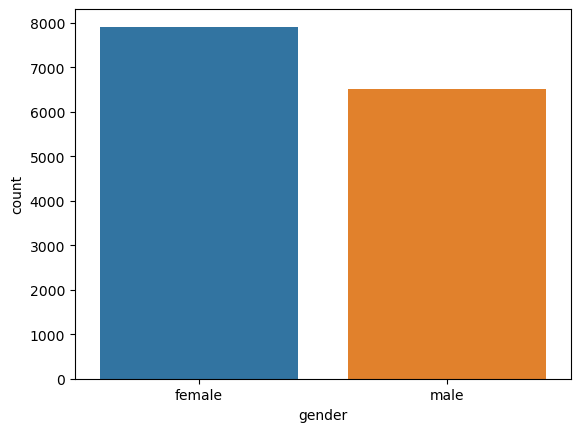

In [11]:
# 새로운 시각화 라이브러리 seaborn 불러오기
import seaborn as sns
# seaborn : matplotlib보다 쉽고 간편하게 사용 가능. 단, 자세한 그래프를 그리기 어렵다.
sns.countplot(data = welfare, x = 'gender')
# countpot(데이터 설명) : 카테고리별 데이터의 개수를 바로 세어주는 함수

# 1. 결혼여부, 종교여부 이상치 확인하고 데이터 변경

### 종교 여부 이상치 확인

- 종교가 있으면 yes, no로 변경
- 1: 있음
- 2: 없음

In [12]:
welfare['religion']

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
14413    1.0
14414    1.0
14415    1.0
14416    1.0
14417    1.0
Name: religion, Length: 14418, dtype: float64

In [13]:
welfare['religion'].value_counts().sort_index()      # sort_index() : 1.0부터 나오도록

religion
1.0    6603
2.0    7815
Name: count, dtype: int64

In [14]:
welfare['religion'] = np.where(welfare['religion'] == 1.0, 'yes', 'no')
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,2.0,yes,NaN,NaN,1.0
1,male,1948.0,2.0,no,NaN,NaN,1.0
2,male,1942.0,3.0,yes,107.0,762.0,1.0
3,male,1962.0,1.0,yes,192.0,855.0,1.0
4,female,1963.0,1.0,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,1.0,yes,NaN,NaN,5.0
14414,female,1992.0,5.0,yes,NaN,NaN,5.0
14415,male,1995.0,5.0,yes,NaN,910.0,5.0
14416,female,1998.0,5.0,yes,200.0,246.0,5.0


In [15]:
welfare['religion'].isna().sum()  # 결측치 확인

0

In [16]:
welfare['religion'].value_counts().sort_index()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

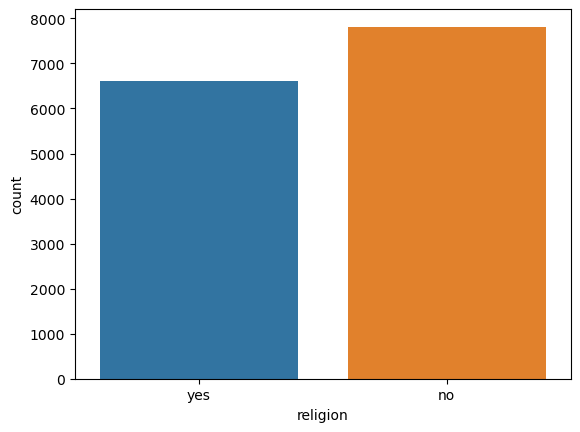

In [17]:
sns.countplot(data = welfare, x = 'religion')

In [18]:
# marriage : 결혼 여부를 묻는 컬럼
welfare['marriage'].value_counts().sort_index()

marriage
0.0    2121
1.0    7190
2.0    1954
3.0     689
4.0      78
5.0    2357
6.0      29
Name: count, dtype: int64

### 결혼 데이터 정보
- 0 : 미해당 (18세 미만)
- 1 : 기혼
- 2 : 사별
- 3 : 이혼 
- 4 : 별거
- 5 : 미혼
- 6 : 기타

### 결혼, 이혼, 기타 3분류로 바꿔보기

In [19]:
def getMarriage(row) :        # 함수 정의
    marriage = row['marriage']
    # 조건문을 통해서 1번 = 'marriage', 3번 = 'divorce', 5번 = 'not marriage', 나머지 ='etc'
    if marriage == 1 : 
        return 'marriage'
    elif marriage == 3 : 
        return 'divorce'
    elif marriage == 5 :
        return 'not marriage'
    else :
        return 'etc'

In [20]:
welfare['marriage'] = welfare.apply(getMarriage, axis = 1)
# apply(함수 이름) : 함수를 행단위 or 열단위로 요소별로 적용시켜주는 함수
# apply <-- 함수에 적용시켜야 할 데이터가 너무 많을 때 for문을 사용하지 않고 적용 가능
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,male,1962.0,marriage,yes,192.0,855.0,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,male,1995.0,not marriage,yes,NaN,910.0,5.0
14416,female,1998.0,not marriage,yes,200.0,246.0,5.0


### countplot으로 표현하기

<Axes: xlabel='marriage', ylabel='count'>

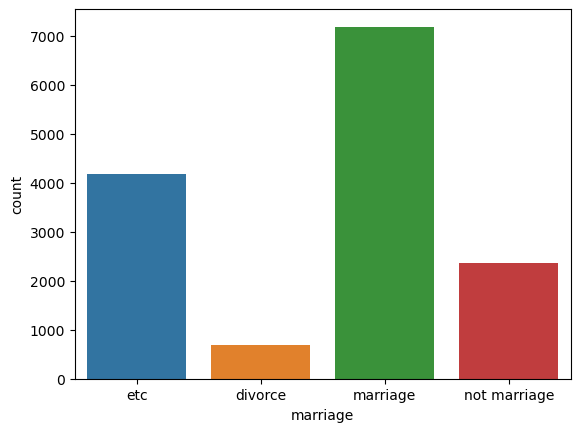

In [21]:
sns.countplot(data = welfare, x = 'marriage')

## 종교 유무에 따른 이혼율 표 만들기

In [22]:
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,male,1962.0,marriage,yes,192.0,855.0,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,male,1995.0,not marriage,yes,NaN,910.0,5.0
14416,female,1998.0,not marriage,yes,200.0,246.0,5.0


In [23]:
welfare.groupby('religion')['marriage'].value_counts()
# groupby : 같은 요소끼리 그룹화

religion  marriage    
no        marriage        3660
          etc             2272
          not marriage    1499
          divorce          384
yes       marriage        3530
          etc             1910
          not marriage     858
          divorce          305
Name: count, dtype: int64

In [24]:
r_g = welfare.groupby('religion', as_index = False)['marriage'].value_counts(normalize = True)
# 각 데이터별 비율을 나타내주는 속성 : normalize = True
# as_index = False : religion으로 그룹화 한 후 인덱스를 숫자로 다시 메겨주겠다!
r_g

,religion,marriage,proportion
0,no,marriage,0.468330
1,no,etc,0.290723
2,no,not marriage,0.191811
3,no,divorce,0.049136
4,yes,marriage,0.534605
5,yes,etc,0.289262
6,yes,not marriage,0.129941
7,yes,divorce,0.046191


In [25]:
prop = r_g[(r_g['marriage'] == 'marriage') | (r_g['marriage'] == 'divorce')]  # 불리언 인덱싱
# or 연산자 기호 : |(shift + \)
prop

,religion,marriage,proportion
0,no,marriage,0.468330
3,no,divorce,0.049136
4,yes,marriage,0.534605
7,yes,divorce,0.046191


In [26]:
a = (prop['proportion'] * 100).round(1)
a

0    46.8
3     4.9
4    53.5
7     4.6
Name: proportion, dtype: float64

In [27]:
prop['proportion'] = a
prop

C:\Users\SMHRD\AppData\Local\Temp\ipykernel_4032\3464845049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop['proportion'] = a


,religion,marriage,proportion
0,no,marriage,46.8
3,no,divorce,4.9
4,yes,marriage,53.5
7,yes,divorce,4.6


<Axes: xlabel='religion', ylabel='proportion'>

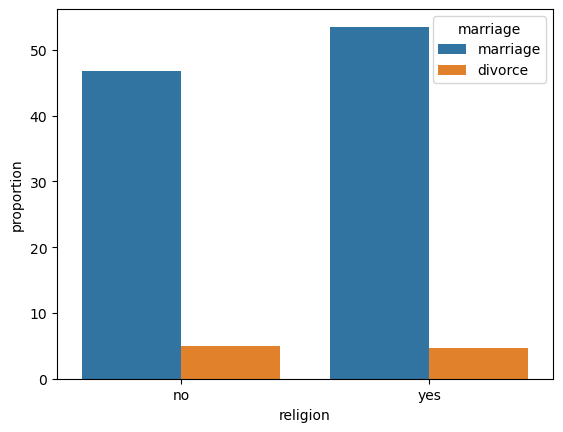

In [28]:
# hue : 색깔이라는 뜻을 가진 단어로, 바 그래프에서 데이터가 각각 어떤 값인지 구분해주는 기능
sns.barplot(data = prop, x = 'religion', y = 'proportion', hue = 'marriage')

## 얻을 수 있는 인사이트는?
- 종교와 이혼율은 크게 상관이 없다!

In [29]:
# 여기서부터는 참고!

In [30]:
# query()  --> 데이터베이스 where절에 들어갈 조건물 쿼리를 가져다 사용할 수 있는 함수
temp = welfare.query('marriage == "marriage" or marriage =="divorce"').groupby('religion', as_index = False)['marriage'].value_counts(normalize = True)  # 파이썬에서 지원하는 것이 아니라서 문자열 형태로 작성해야함
temp    # etc, not marriage 데이터가 생략되어 비율이 높게 나왔음

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [31]:
temp['proportion'] = (temp['proportion'] * 100).round(1)
temp

,religion,marriage,proportion
0,no,marriage,90.5
1,no,divorce,9.5
2,yes,marriage,92.0
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

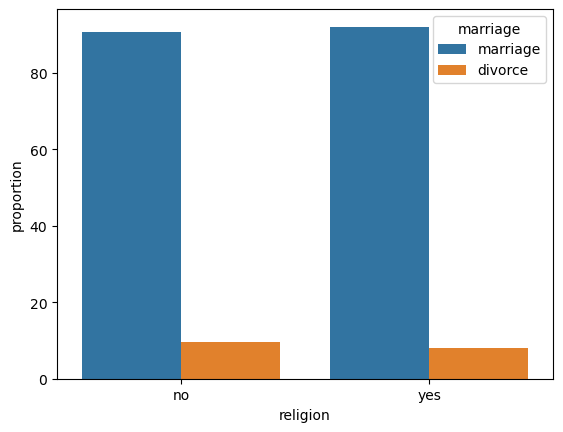

In [32]:
sns.barplot(data = temp, x = 'religion', y = 'proportion', hue = 'marriage')

# 2. 성별에 따른 수입 확인하기

In [33]:
# describe() 함수 : 수치형 변수들만을 기준으로 
# 카운트, 평균, 표준편차, 최소/최대값, 25%, 50%, 75% 값을 각각 구해줌 -> 수치해석 함수
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [34]:
welfare['income'].isna().sum()  # 결측치 확인

9884

#### min값을 바탕으로 0원 이라는 이상치, 9884개의 결측치 확인

In [35]:
# query() 함수 사용하기
# income이라는 컬럼 값이 0인 튜플만 출력
# SELECT * FROM welfare WHERE income = 0
welfare.query('income == 0')

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983.0,marriage,no,0.0,311.0,5.0
6347,female,1983.0,marriage,yes,0.0,252.0,1.0
6632,female,1991.0,not marriage,yes,0.0,313.0,2.0
10487,female,1980.0,marriage,no,0.0,311.0,3.0
10620,female,1985.0,marriage,yes,0.0,320.0,3.0
10818,female,1981.0,marriage,yes,0.0,243.0,3.0
13654,female,1978.0,marriage,yes,0.0,252.0,6.0


#### 수입이 0원으로 되어있는 총 7개의 데이터를 확인!
- code_job을 바탕으로 직업이 있는 것으로 판단되나, 수입이 없다.

In [36]:
# 인코딩방법 : euc-kr 이용해서 
job_code = pd.read_csv('job_code.csv', encoding = 'euc-kr')
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [37]:
# 311, 252, 313, 320, 243 데이터가 어떤 직업을 가지고 있는지 query() 함수로 불러와보자
job_code.query('code_job in (311, 252, 313, 320, 243)')
# job_code.query('code_job == 243 or code_job == 252 or code_job ==313 or code_job ==311 or code_job == 320')

,code_job,job
35,243,간호사
42,252,학교 교사
60,311,행정 사무원
62,313,회계 및 경리 사무원
64,320,금융 사무 종사자


In [38]:
# code_job이 252인 데이터
welfare.query('code_job == 252')

,gender,birth,marriage,religion,income,code_job,code_region
409,male,1982.0,marriage,no,450.0,252.0,1.0
577,female,1973.0,marriage,yes,525.0,252.0,2.0
735,female,1978.0,marriage,yes,510.0,252.0,1.0
894,female,1975.0,marriage,no,508.0,252.0,1.0
897,female,1979.0,marriage,no,400.0,252.0,7.0
...,...,...,...,...,...,...,...
13644,female,1985.0,not marriage,no,458.0,252.0,3.0
13654,female,1978.0,marriage,yes,0.0,252.0,6.0
13655,male,1977.0,marriage,yes,499.0,252.0,6.0
13883,male,1964.0,marriage,no,759.0,252.0,5.0


### 수입이 없는 7명의 직업이 제대로 존재한다 그럼에도 불구하고 데이터에 오류!

#### 데이터 오류 해결방법 2가지
- 1. 이상치 채워주기 (예 - 해당 직업의 평균 연봉, 중간 값 넣어주기)
- 2. 이상치 버려주기 (주로 이상치 데이터를 삭제해도 무관할 때)

In [39]:
welfare[welfare['income'].isna()]   # 결측치 데이터 확인

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
5,female,2003.0,etc,yes,NaN,NaN,1.0
6,male,1927.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14412,male,1967.0,marriage,yes,NaN,874.0,5.0
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,male,1995.0,not marriage,yes,NaN,910.0,5.0


In [40]:
# 결측치가 아닌 데이터
welfare[welfare['income'].notna()]

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,male,1962.0,marriage,yes,192.0,855.0,1.0
7,female,1934.0,marriage,yes,27.0,941.0,1.0
8,female,1940.0,etc,yes,27.0,999.0,2.0
14,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...
14401,male,1966.0,marriage,yes,280.0,874.0,6.0
14402,female,1962.0,marriage,yes,209.0,930.0,6.0
14405,female,1947.0,etc,no,27.0,941.0,6.0
14410,male,1956.0,marriage,yes,200.0,854.0,6.0


In [41]:
# 직업이 있음에도 수입을 적지 않은 사람을 보려면?
# 즉, 결측치를 제거할 때 수입과 직업이 동시에 NULL인 사람을 제거!
welfare.query('income.isna() and code_job.isna()')

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945.0,etc,yes,NaN,NaN,1.0
1,male,1948.0,etc,no,NaN,NaN,1.0
4,female,1963.0,marriage,yes,NaN,NaN,1.0
5,female,2003.0,etc,yes,NaN,NaN,1.0
6,male,1927.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14407,male,1933.0,marriage,no,NaN,NaN,6.0
14409,female,1934.0,etc,yes,NaN,NaN,6.0
14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0


In [42]:
# 수입과 직업코드가 동시에 NULL인 값만 제거(drop())
ind = welfare[(welfare['income'].isna()) & (welfare['code_job'].isna())].index
ind

Index([    0,     1,     4,     5,     6,     9,    10,    11,    12,    13,
       ...
       14397, 14400, 14403, 14404, 14406, 14407, 14409, 14413, 14414, 14417],
      dtype='int64', length=7540)

In [43]:
welfare_drop = welfare.drop(ind)
welfare_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6878 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       6878 non-null   object 
 1   birth        6878 non-null   float64
 2   marriage     6878 non-null   object 
 3   religion     6878 non-null   object 
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  6878 non-null   float64
dtypes: float64(4), object(3)
memory usage: 429.9+ KB


In [44]:
# 인덱스 번호 정리
welfare_drop.index = range(1,len(welfare_drop)+1)    # (1, 2, 3, ..., 데이터의 길이+1)
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942.0,divorce,yes,107.0,762.0,1.0
2,male,1962.0,marriage,yes,192.0,855.0,1.0
3,female,1934.0,marriage,yes,27.0,941.0,1.0
4,female,1940.0,etc,yes,27.0,999.0,2.0
5,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...
6874,male,1956.0,marriage,yes,200.0,854.0,6.0
6875,female,1958.0,marriage,yes,NaN,611.0,6.0
6876,male,1967.0,marriage,yes,NaN,874.0,5.0
6877,male,1995.0,not marriage,yes,NaN,910.0,5.0


In [45]:
welfare_drop['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [46]:
welfare_drop['code_job']
welfare_drop['income']     # 두 개 데이터만 가지고 새로운 데이터프레임 생성
welfare_drop[['code_job', 'income']]  # 시리즈 두 개를 합쳐서 새로운 데이터프레임 생성

,code_job,income
1,762.0,107.0
2,855.0,192.0
3,941.0,27.0
4,999.0,27.0
5,312.0,338.0
...,...,...
6874,854.0,200.0
6875,611.0,NaN
6876,874.0,NaN
6877,910.0,NaN


In [47]:
code_income_median = welfare_drop[['code_job', 'income']].groupby('code_job').median() 
# median() : 중간값을 구해주는 함수
code_income_median

,income
code_job,
111.0,461.0
112.0,465.0
121.0,754.0
122.0,467.5
131.0,566.5
...,...
992.0,183.0
999.0,27.0
1001.0,572.0


In [48]:
code_income_median[code_income_median['income'].isna()]   # 결측치 확인
# 불리언 인덱싱을 통해서 수입이 NULL값인 잡코드만 출력

,income
code_job,
423.0,NaN
613.0,NaN
823.0,NaN


In [49]:
# 사용자 정의 함수 사용해서 income 컬럼의 결측치 제거
# code_income_median[welfare_drop['code_job']]   
# 데이터프레임 인덱싱 -> 행 기준으로 인덱싱됨 -> 결과값이 열이 나옴  => 오류발생!

code_income_median.loc[welfare_drop['code_job']] # loc/iloc 인덱서 사용!

,income
code_job,
762.0,303.0
855.0,251.5
941.0,60.0
999.0,27.0
312.0,393.0
...,...
854.0,357.5
611.0,218.0
874.0,338.5


In [50]:
# 직업코드 762번의 수입 중간값은? --> 303이다!
code_income_median.loc[welfare_drop['code_job']].values[0]

array([303.])

In [51]:
# 사용자 정의 함수  --> income(수입) 값이 결측치인지 아닌지
def fill_income(row) :     # income의 결측치를 제거해주는 함수
    
    # 수입 값이 결측치일 때!
    if np.isnan(row['income']) :    # 연산의 속도를 위해 numpy 라이브러리 사용
        return code_income_median.loc[row['code_job']].values[0]              
                # 수입 값이 결측치라면, 그 직업의 중간값을 대입
        
    else :  # 수입 값이 결측치가 아닐때!
        return row['income']

In [52]:
# 함수 적용
welfare_drop['income'] =  welfare_drop.apply(fill_income, axis = 1)   # 결측치 빼고 갱신
welfare_drop[welfare_drop['income'].isnull()]
# 함수를 적용하고 나면 null값이 없어야 하는 것 아닌가?  

,gender,birth,marriage,religion,income,code_job,code_region
239,male,1966.0,marriage,no,NaN,823.0,1.0
240,female,1966.0,marriage,no,NaN,823.0,1.0
713,male,1947.0,marriage,no,NaN,823.0,1.0
714,female,1949.0,marriage,no,NaN,823.0,1.0
718,male,1957.0,marriage,no,NaN,823.0,1.0
719,female,1963.0,marriage,no,NaN,823.0,1.0
769,male,1975.0,marriage,no,NaN,823.0,1.0
1034,male,1959.0,marriage,yes,NaN,823.0,3.0
1066,male,1938.0,marriage,yes,NaN,823.0,3.0
1342,male,1936.0,etc,no,NaN,613.0,4.0


In [53]:
# income 데이터가 NULL이면 해당 직업의 중간값으로 대체하는 작업을 했는데
# 중간값마저도 NULL인 데이터가 존재!
welfare_drop[welfare_drop['income'].isnull()].size

385

In [54]:
# dropna : NULL값을 삭제하겠다
# subset = ['a']  : a컬럼 안의 NULL값을 삭제하겠다
welfare_drop = welfare_drop.dropna(subset = ['income'])
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942.0,divorce,yes,107.0,762.0,1.0
2,male,1962.0,marriage,yes,192.0,855.0,1.0
3,female,1934.0,marriage,yes,27.0,941.0,1.0
4,female,1940.0,etc,yes,27.0,999.0,2.0
5,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...
6874,male,1956.0,marriage,yes,200.0,854.0,6.0
6875,female,1958.0,marriage,yes,218.0,611.0,6.0
6876,male,1967.0,marriage,yes,338.5,874.0,5.0
6877,male,1995.0,not marriage,yes,260.0,910.0,5.0


In [55]:
welfare_drop[welfare_drop['income'].isnull()].size    # 결측치 제거 완료!

0

In [56]:
# NaN값 이외에 제거해야 할 데이터 -> 수입이 0인 데이터
welfare_drop[welfare_drop['income'] == 0].size

49

In [57]:
welfare_drop['income'] = np.where(welfare_drop['income'] == 0, np.nan, welfare_drop['income'])
# 0이면 NULL로 채워주고 아니라면 그대로 수입 출력
welfare_drop['income'].isna().sum()    # NULL 값 7개 추가

C:\Users\SMHRD\AppData\Local\Temp\ipykernel_4032\484092972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  welfare_drop['income'] = np.where(welfare_drop['income'] == 0, np.nan, welfare_drop['income'])


7

In [58]:
# 결측치 최종 제거 - dropna
gender_income = welfare_drop.dropna(subset = ['income'])

In [59]:
gender_income

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942.0,divorce,yes,107.0,762.0,1.0
2,male,1962.0,marriage,yes,192.0,855.0,1.0
3,female,1934.0,marriage,yes,27.0,941.0,1.0
4,female,1940.0,etc,yes,27.0,999.0,2.0
5,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...
6874,male,1956.0,marriage,yes,200.0,854.0,6.0
6875,female,1958.0,marriage,yes,218.0,611.0,6.0
6876,male,1967.0,marriage,yes,338.5,874.0,5.0
6877,male,1995.0,not marriage,yes,260.0,910.0,5.0


In [60]:
gender_income = welfare_drop.groupby('gender', as_index = False).agg(mean_income = ('income', 'mean'))
# agg() => apply() 함수와 비슷한 역할, 여러 개의 함수를 한번에 적용할 수 있다는 장점
# agg(만들 컬럼 이름 = (이용할 값, 사용할 함수))
gender_income

,gender,mean_income
0,female,190.280031
1,male,311.430076


<Axes: xlabel='gender', ylabel='mean_income'>

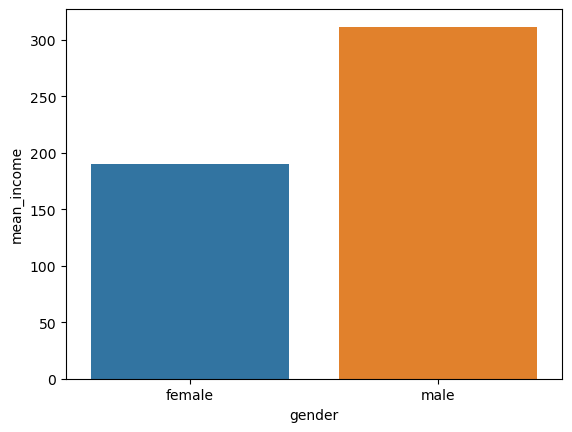

In [61]:
sns.barplot(data = gender_income, x = 'gender', y = 'mean_income')

### 우리가 얻은 최종 인사이트 : 남자가 평균적으로 여자보다 수입이 높다

# 추가 내용(ex06 해당 내용)

### 나이 파생변수 만들기

In [62]:
welfare['birth']

0        1945.0
1        1948.0
2        1942.0
3        1962.0
4        1963.0
          ...  
14413    1967.0
14414    1992.0
14415    1995.0
14416    1998.0
14417    2001.0
Name: birth, Length: 14418, dtype: float64

In [63]:
welfare['birth'].isna().sum()

0

In [64]:
welfare['age'] = 2019 - welfare['birth']
welfare['age']

0        74.0
1        71.0
2        77.0
3        57.0
4        56.0
         ... 
14413    52.0
14414    27.0
14415    24.0
14416    21.0
14417    18.0
Name: age, Length: 14418, dtype: float64

In [65]:
welfare['age'].describe()
# 이상치 발견

count    14418.000000
mean        49.719795
std         24.402250
min          1.000000
25%         29.000000
50%         51.000000
75%         71.000000
max        112.000000
Name: age, dtype: float64

In [66]:
age_income = welfare.groupby('age', as_index = False).agg(income_mean = ('income', 'mean'))
age_income

,age,income_mean
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
3,4.0,NaN
4,5.0,NaN
...,...,...
97,98.0,NaN
98,99.0,NaN
99,100.0,NaN
100,102.0,NaN


In [69]:
age_income.query('income_mean.isna()')
age_income.query('income_mean.isna()')['age'].count()

28

In [70]:
age_income[age_income['income_mean'].notna()]

,age,income_mean
17,18.0,162.000000
18,19.0,121.333333
19,20.0,136.400000
20,21.0,123.666667
21,22.0,179.676471
...,...,...
86,87.0,27.000000
87,88.0,27.000000
88,89.0,27.000000
89,90.0,20.000000


In [71]:
age_income = age_income.dropna(subset = ['income_mean'])
age_income

,age,income_mean
17,18.0,162.000000
18,19.0,121.333333
19,20.0,136.400000
20,21.0,123.666667
21,22.0,179.676471
...,...,...
86,87.0,27.000000
87,88.0,27.000000
88,89.0,27.000000
89,90.0,20.000000


<Axes: xlabel='age', ylabel='income_mean'>

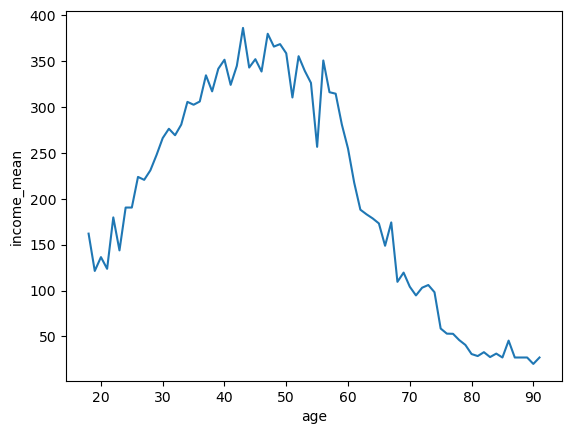

In [72]:
# drop 했을 때
sns.lineplot(data = age_income, x = 'age', y = 'income_mean')

<Axes: xlabel='age', ylabel='income_mean'>

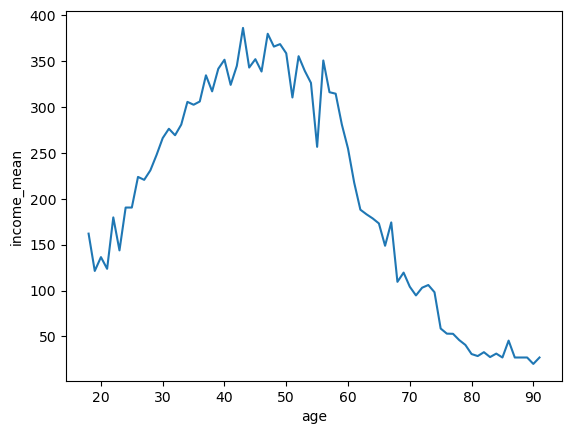

In [73]:
# drop 안 했을 때
sns.lineplot(data = age_income, x = 'age', y = 'income_mean')

## 알 수 있는 insight
- 수입이 가장 많은 나이는 40대, 50대 사이이다.
- 60세 이후에 수입이 급감한다.

## 실습) 나이 및 성별 월급 차 보기

In [75]:
age_income = welfare.groupby(['age','gender'], as_index = False).agg(income_mean = ('income','mean'))
age_income

,age,gender,income_mean
0,1.0,female,NaN
1,1.0,male,NaN
2,2.0,female,NaN
3,2.0,male,NaN
4,3.0,female,NaN
...,...,...,...
195,99.0,female,NaN
196,100.0,female,NaN
197,100.0,male,NaN
198,102.0,male,NaN


In [77]:
age_gender_income = age_income = welfare.groupby(['age','gender'],as_index = False).agg(income_mean = ('income','mean'))
age_gender_income

,age,gender,income_mean
0,1.0,female,NaN
1,1.0,male,NaN
2,2.0,female,NaN
3,2.0,male,NaN
4,3.0,female,NaN
...,...,...,...
195,99.0,female,NaN
196,100.0,female,NaN
197,100.0,male,NaN
198,102.0,male,NaN


In [78]:
age_gender_income = age_gender_income.dropna(subset = ['income_mean'])
age_gender_income

,age,gender,income_mean
35,18.0,male,162.000000
36,19.0,female,87.666667
37,19.0,male,155.000000
38,20.0,female,124.000000
39,20.0,male,186.000000
...,...,...,...
175,88.0,male,27.000000
176,89.0,female,27.000000
178,90.0,female,27.000000
179,90.0,male,13.000000


<Axes: xlabel='age', ylabel='income_mean'>

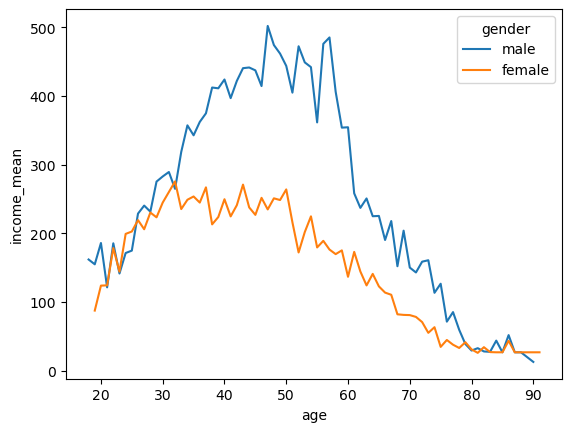

In [81]:
sns.lineplot(data = age_gender_income, x = 'age', y = 'income_mean', hue = 'gender')

In [82]:
welfare.query("age == 1 | age >= 100")

,gender,birth,marriage,religion,income,code_job,code_region,age
566,male,1917.0,etc,no,NaN,NaN,7.0,102.0
804,female,2018.0,etc,yes,NaN,NaN,2.0,1.0
2111,female,2018.0,etc,no,NaN,NaN,3.0,1.0
2178,male,2018.0,etc,no,NaN,NaN,3.0,1.0
2427,female,2018.0,etc,no,NaN,NaN,3.0,1.0
2726,female,2018.0,etc,yes,NaN,NaN,2.0,1.0
2808,female,1907.0,etc,yes,NaN,NaN,4.0,112.0
4128,male,2018.0,etc,yes,NaN,NaN,7.0,1.0
4259,female,2018.0,etc,no,NaN,NaN,7.0,1.0
4332,male,2018.0,etc,no,NaN,NaN,7.0,1.0


## 데이터 결합하기

In [85]:
welfare_job = welfare.merge(job_code, how = 'left', on = 'code_job')
welfare_job

,gender,birth,marriage,religion,income,code_job,code_region,age,job
0,female,1945.0,etc,yes,NaN,NaN,1.0,74.0,NaN
1,male,1948.0,etc,no,NaN,NaN,1.0,71.0,NaN
2,male,1942.0,divorce,yes,107.0,762.0,1.0,77.0,전기공
3,male,1962.0,marriage,yes,192.0,855.0,1.0,57.0,금속기계 부품 조립원
4,female,1963.0,marriage,yes,NaN,NaN,1.0,56.0,NaN
...,...,...,...,...,...,...,...,...,...
14413,female,1967.0,marriage,yes,NaN,NaN,5.0,52.0,NaN
14414,female,1992.0,not marriage,yes,NaN,NaN,5.0,27.0,NaN
14415,male,1995.0,not marriage,yes,NaN,910.0,5.0,24.0,건설 및 광업 단순 종사자
14416,female,1998.0,not marriage,yes,200.0,246.0,5.0,21.0,보건 의료 관련 종사자


In [ ]:
# welfare_job2 = welfare.merge(job_code, how ='right', on = 'code_job')
# welfare_job2

In [86]:
welfare_drop_job = welfare_job.dropna(subset=['job', 'income'])
welfare_drop_job

,gender,birth,marriage,religion,income,code_job,code_region,age,job
2,male,1942.0,divorce,yes,107.0,762.0,1.0,77.0,전기공
3,male,1962.0,marriage,yes,192.0,855.0,1.0,57.0,금속기계 부품 조립원
7,female,1934.0,marriage,yes,27.0,941.0,1.0,85.0,청소원 및 환경미화원
8,female,1940.0,etc,yes,27.0,999.0,2.0,79.0,기타 서비스 관련 단순 종사자
14,male,1978.0,marriage,no,338.0,312.0,1.0,41.0,경영 관련 사무원
...,...,...,...,...,...,...,...,...,...
14401,male,1966.0,marriage,yes,280.0,874.0,6.0,53.0,물품 이동 장비 조작원
14402,female,1962.0,marriage,yes,209.0,930.0,6.0,57.0,제조 관련 단순 종사자
14405,female,1947.0,etc,no,27.0,941.0,6.0,72.0,청소원 및 환경미화원
14410,male,1956.0,marriage,yes,200.0,854.0,6.0,63.0,운송차량 및 기계 관련 조립원
